In [1]:
import sympy
from sympy import Symbol, symbols, S, Function, integrate, Integral, diff, solve, solveset, Eq, cos, log

## Занятие 9
## Математический анализ
## Интегрирование функции: первообразная и неопределенный интеграл
https://docs.sympy.org/1.5.1/modules/integrals/integrals.html

https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B2%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BD%D0%B0%D1%8F

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D0%BB%D0%BE%D0%B2_%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9

### Задача 1.
Вычислить определенные интегралы:
$$
1)\ \int_2^3 \frac{1}{\sqrt{x-2}},\ 2) \int_1^6 \frac{1}{(x-1)^3},\ 3)\ \int_2^\infty \frac{1}{(x-1)^3} 
$$

In [2]:
# ДАНО:
x = Symbol('x')
f1 = 1/sympy.sqrt(x-2)
f2 = 1/(x-1)**3
f3 = 1/(x-1)**3

In [3]:
# Пример 1
display(f1.integrate((x, 2, 3)))

# Пример 2
display(f2.integrate((x, 1, 6)))

# Пример 3
display(f3.integrate((x, 2, S.Infinity)))

2

oo

1/2

### Задача 2
Описать функцию, находящую неопределенный интеграл $\int f(x)\,dx$ в виде $F(x)+C$.

Использовать эту функцию для интегрирования $\sin(3x+5)$, $x{\rm tg}(x^2)$, $(e^{\sin x})\cos x$, $x^2e^{x^3}$

In [4]:
def Unknown_Integral(current_func, parametric_symbol, const_symb):
    current_func = current_func.integrate(parametric_symbol) + const_symb
    return current_func

In [5]:
x = Symbol('x')
C = Symbol('C')
f1 = sympy.sin(3*x + 5)
f2 = x * sympy.tan(x**2)
f3 = sympy.exp(sympy.sin(x)) * sympy.cos(x)
f4 = x**2 * sympy.exp(x**3)

display(Unknown_Integral(f1, x, C))
display(Unknown_Integral(f2, x, C))
display(Unknown_Integral(f3, x, C))
display(Unknown_Integral(f4, x, C))

C - cos(3*x + 5)/3

C + log(tan(x**2)**2 + 1)/4

C + exp(sin(x))

C + exp(x**3)/3

### Задача 3.
Найти первообразную функции $\frac{x-3}{(x+1)^2}$, график которой проходит через начало координат.

In [6]:
# ДАНО:
x = Symbol('x')
C = Symbol('C')
f = (x - 3)/(x + 1)**2

In [7]:
# Найдём C, при котором интеграл будет проходить через координаты (0, 0)
myUknown = Unknown_Integral(f, x, C)
display(Eq(myUknown, 0))
myConst = solve(myUknown.subs(x, 0))[0]
print(f"C = {myConst}")

Eq(C + log(x + 1) + 4/(x + 1), 0)

C = -4


In [8]:
# Запишем искомую первообразную при C = -4
print("Ответ:")
myUknown.subs(C, -4)

Ответ:


log(x + 1) - 4 + 4/(x + 1)

### Задача 4.
Описать функцию, вычисляющую неопределенный интеграл от $\frac{1}{\sqrt{x^2+a}}$ по формуле "длинного логарифма":
$$
\int\frac{1}{\sqrt{x^2+a}} = \ln|x + \sqrt{x^2 + a}| + C,\quad a \neq 0. 
$$
Функция возвращает $\ln|x| + C$ при $a = 0$. Аргументы функции - переменная интегрирования $x$ и параметр $a$.

Вызвать функцию при $a = 0, 1, 4$. Сравнить с результатом integrate.

Проверить дифференцированием, при необходимости использовать simplyfy для того, чтобы упростить выражение.

Рекомендется создавать положительные символы, чтобы не было неоднозначности.

In [9]:
x, a = symbols('x, a', positive=True)
def dl(a):
    if a == 0:
        res = sympy.simplify(sympy.log(abs(x)) + C)
    else:
        res = sympy.simplify(sympy.log(abs(x + sympy.sqrt(x**2 + a))) + C)
    print('При a = ', a, ':', sep='')
    display(res)

a_arr = (0, 1, 4)
for a in a_arr:
    dl(a)
    display(sympy.simplify(integrate(1/sympy.sqrt(x**2 + a))))
    print()

При a = 0:


C + log(x)

log(x)


При a = 1:


C + log(x + sqrt(x**2 + 1))

asinh(x)


При a = 4:


C + log(x + sqrt(x**2 + 4))

asinh(x/2)

### Задача 5.
Провести замену переменной $y = x^2$ в интеграле $\int x e^{x^2}\,dx$.

In [10]:
# ДАНО:
x = Symbol('x')
y = Symbol('y', positive=True)
f = x * sympy.exp(x**2)

print("заданная функция:")
display(Eq(Symbol('f(x)'), f))

print("\nинтеграл по x:")
I = Integral(f)
display(I)

print("\nновый интеграл по y:")
I = I.transform(x**2, y)
display(I)

заданная функция:


Eq(f(x), x*exp(x**2))


интеграл по x:


Integral(x*exp(x**2), x)


новый интеграл по x:


Integral(exp(y)/2, y)

### Индивидуальное задание
Провести замену переменных в определенном интеграле, представить результат в виде двух уравнений, как в примере:
\begin{align*}
\int_1^4 \frac{dx}{\sqrt{x}\left(\sqrt{x}+1\right)} = \int_1^2 \frac{2\,dy}{y + 1}\\
\int_1^2 \frac{2\,dy}{y + 1} = 2(\ln 3 - \ln 2)
\end{align*}
(с точностью до перестановки слагаемых и сомножителей)

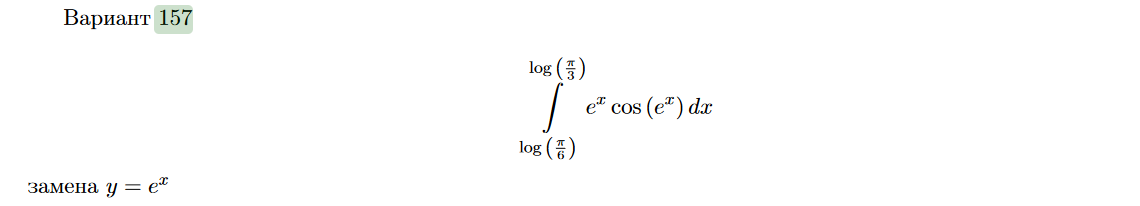

In [11]:
# ДАНО:
x = Symbol('x')
y = Symbol('y', positive=True)
myFunction = sympy.exp(x) * cos(sympy.exp(x))
myIntegral = Integral(myFunction, (x, log(sympy.pi/6), log(sympy.pi/3)))

In [12]:
# Замена y = e^x
mySubsIntegral = myIntegral.transform(sympy.exp(x), y)
Eq(myIntegral, mySubsIntegral)

Eq(Integral(exp(x)*cos(exp(x)), (x, log(pi/6), log(pi/3))), Integral(cos(y), (y, pi/6, pi/3)))

In [13]:
Eq(mySubsIntegral, mySubsIntegral.integrate(y))

Eq(Integral(cos(y), (y, pi/6, pi/3)), y*(-1/2 + sqrt(3)/2))

Хорасанджян Левон, вариант №157